# Lab 5 - Exploratory Data Analysis

In [1]:
% matplotlib inline

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

## Exploratory Data Analysis

In this Module, we partitioned the problem of EDA using a taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Boxplots Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

The goal for this lab is to get you acquainted with most of these tools by analyzing a real data set. Follow the general directions in this Module for *methodical* EDA including:

1. Single Variable Exploration.
2. Correlation or Problem driven Exploration of Pairwise Relationships.

Because we don't really have a problem or question here, we may have to be exhaustive. There are 21 comparisons possible, start with any 5 of them and then use what you discover to add 5 more.

And for each case, try different visualizations. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes? And the most important bit: you must write something for every single chart you produce. The emphasis here is on *science*. At every juncture, you must say:

1. **Why am I trying this?** "I'm going to look at this data using a box and whiskers plot to explore its general shape." "I am trying more bins to see if the histogram reveals any interesting characteristics."
2. **Do it.**
3. **What did I learn?** "Although I know the data is generated from a normal distribution, it doesn't look normally distributed. The sample mean is X while the true mean is Y."

In EDA, you should generally never just *change* anything. You should copy your code, explain why you're making some change to the parameters, make the change and then note what happens.

Be inventive and creative.

In [86]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

sns.set(style="whitegrid")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Answer

In [3]:
insurance = pd.read_csv('insurance.csv')

## Get some initial understanding about the data

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


It looks like there's 7 variables in this dataset. The charges appear to be what they were charged. It looks like the other 6 variables could possibly be related to charges. 

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


For here, we can see that there does not appear to be any missing values. There are 1338 entries in here. It looks like age, bmi, children, and charges are numerical in nature. It looks like sex, smoker, and region are categorical.

## Univariate Analysis

### Numerical Variables

In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can see that the age seems to start at 18, which means that no children are in this dataset. It also ends at 64, which might mean that this sample only contains working adults. I'm not sure what body mass index numbers mean, but 53 BMI seems pretty high. It seems that most of the people have a small number of children. The charges seem pretty to have a few high outliers.

#### age

Text(0.5,0,'age')

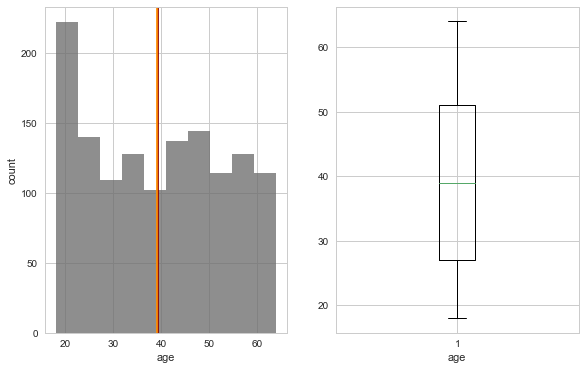

In [27]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 4, 1)
axes.hist( insurance['age'], alpha=0.75, color="DimGray")
axes.axvline( np.mean( insurance['age']), color="DarkRed")
axes.axvline( np.median( insurance['age']), color="DarkOrange")
axes.set_xlabel( "age")
axes.set_ylabel( "count")
axes = figure.add_subplot(1, 4, 2)
axes.boxplot(insurance['age'],sym='k.')
axes.set_xlabel('age')

It appears that there are a lot of younger people in this data compared to the other age groups, but otherwise, the data seems pretty fairly uniformly distributed

#### bmi

Text(0.5,0,'bmi')

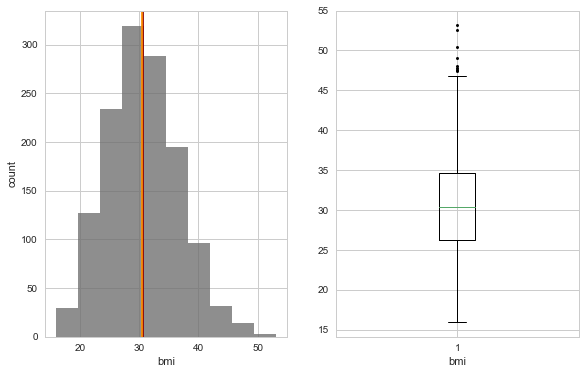

In [31]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 4, 1)
axes.hist( insurance['bmi'], alpha=0.75, color="DimGray")
axes.axvline( np.mean( insurance['bmi']), color="DarkRed")
axes.axvline( np.median( insurance['bmi']), color="DarkOrange")
axes.set_xlabel( "bmi")
axes.set_ylabel( "count")
axes = figure.add_subplot(1, 4, 2)
axes.boxplot(insurance['bmi'],sym='k.')
axes.set_xlabel('bmi')

It appears that the data is fairly uniformly distributed, with only a few outliers on the outside.

#### children

Text(0.5,0,'children')

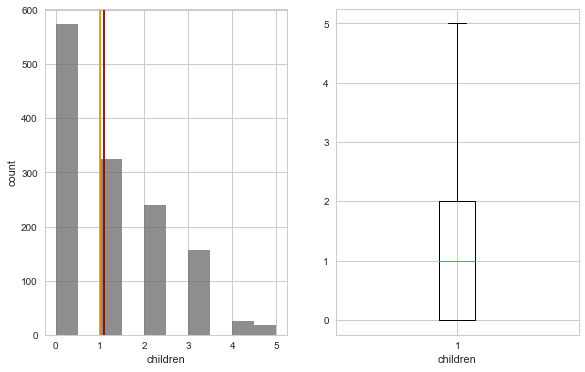

In [29]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 4, 1)
axes.hist( insurance['children'], alpha=0.75, color="DimGray")
axes.axvline( np.mean( insurance['children']), color="DarkRed")
axes.axvline( np.median( insurance['children']), color="DarkOrange")
axes.set_xlabel( "children")
axes.set_ylabel( "count")
axes = figure.add_subplot(1, 4, 2)
axes.boxplot(insurance['children'],sym='k.')
axes.set_xlabel('children')

From this analysis, it looks like children might be better classified as a categorical variable, since it looks like it only has a few distinct integer values. It seems the mode is 0 children with the number of people decreasing for every 1 increase in children. 

#### charges

Text(0.5,0,'charges')

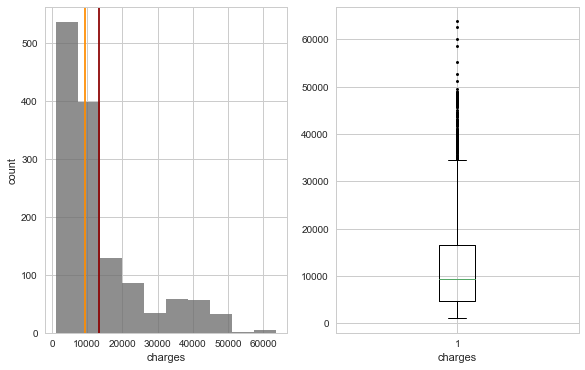

In [30]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 4, 1)
axes.hist( insurance['charges'], alpha=0.75, color="DimGray")
axes.axvline( np.mean( insurance['charges']), color="DarkRed")
axes.axvline( np.median( insurance['charges']), color="DarkOrange")
axes.set_xlabel( "charges")
axes.set_ylabel( "count")
axes = figure.add_subplot(1, 4, 2)
axes.boxplot(insurance['charges'],sym='k.')
axes.set_xlabel('charges')

It appears that most people get under 10000-15000 for their charges, while some people get really high numbers. Only a few people get above 60000, so it might be worthwhile to see why. 

### Categorical variables

In [35]:
insurance.loc[:,['sex','smoker','region']].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


It seems that there are only 2 unique values for sex and smoker, and 4 unique values for region. It seems there are more males than females, more non-smokers than smokers, and more southeast than other regions.

#### sex

In [41]:
counts = insurance["sex"].value_counts().sort_index()
counts

female    662
male      676
Name: sex, dtype: int64

#### sex

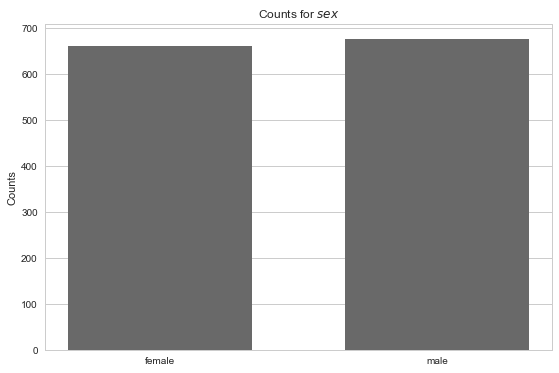

In [48]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 2, 1)
axes.bar(range(len(counts)), counts, 1/1.5, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Counts for $sex$")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

It seems that although there are slightly more males, overall this data is fairly balanced in terms of gender. 

#### smoker

In [50]:
counts=insurance["smoker"].value_counts().sort_index()
counts

no     1064
yes     274
Name: smoker, dtype: int64

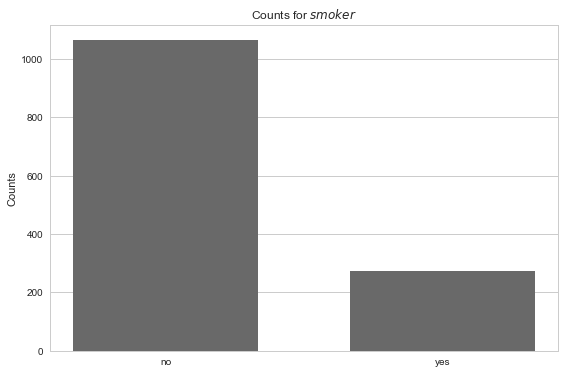

In [51]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 2, 1)
axes.bar(range(len(counts)), counts, 1/1.5, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Counts for $smoker$")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

As we had noted before, there is a significant skew towards being a non-smoker. 

#### region

In [52]:
counts=insurance["region"].value_counts().sort_index()
counts

northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

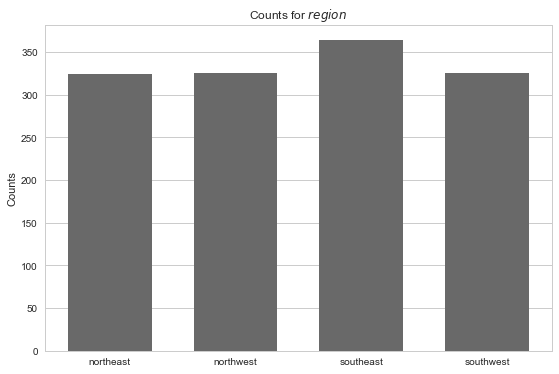

In [54]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 2, 1)
axes.bar(range(len(counts)), counts, 1/1.5, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Counts for $region$")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

It seems like the southeast region is the most popular, but the other regions have pretty much the same number of responses. This could indicate some sort of response bias or sampling bias.

## Multivariate analysis 

Now that we have an idea of what the variables look like, we will have to start digging into the relationships between the variables. Here's my initial idea of what to look at:

1. age vs. bmi
2. region vs. bmi
3. smoker vs. bmi
4. age vs. children
5. bmi vs. charges

#### age vs. bmi
For this, I expect younger people to be skinnier than older people.

In [83]:
print( "r =", stats.pearsonr(insurance["age"], insurance["bmi"])[0])
print( "rho =", stats.spearmanr(insurance["age"], insurance["bmi"])[0])

r = 0.10927188154853515
rho = 0.10773603532023862


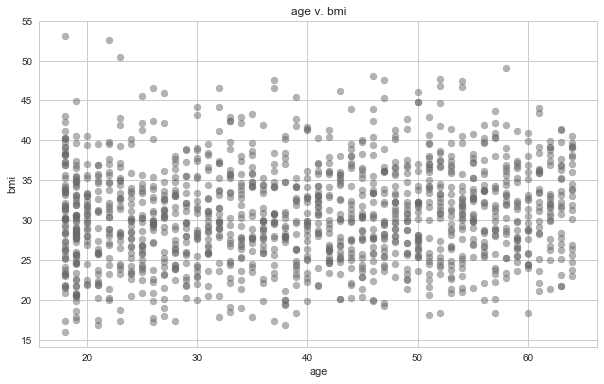

In [89]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
#lowess = sm.nonparametric.lowess( insurance["age"], insurance["bmi"], frac=.3)
#lowess_x = list(zip(*lowess))[0]
#lowess_y = list(zip(*lowess))[1]

axes.scatter( insurance["age"], insurance["bmi"],alpha=.5, marker="o", color="DimGray")
#axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("age v. bmi")
axes.set_xlabel( "age")
axes.set_ylabel( "bmi")
plt.show()
plt.close()

It does not look like age is correlated that well with BMI, which is surprising to me. 

#### region vs. bmi
For this, I expect the south to be fatter than the north

In [56]:
insurance.groupby('region')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,29.173503,5.937513,15.960,24.86625,28.88,32.89375,48.07
northwest,325.0,29.199785,5.136765,17.385,25.74500,28.88,32.77500,42.94
southeast,364.0,33.355989,6.477648,19.800,28.57250,33.33,37.81250,53.13
southwest,325.0,30.596615,5.691836,17.400,26.90000,30.30,34.60000,47.60


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


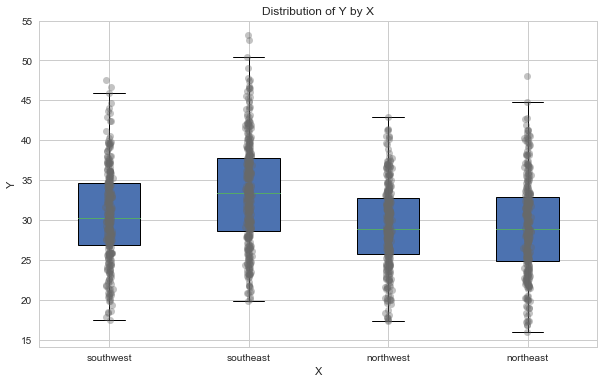

In [65]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
grouped = insurance.groupby('region')[ "bmi"]
labels = pd.unique(insurance["region"].values)
grouped_data = [grouped.get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
for i, k in enumerate(labels):
    subdata = grouped.get_group( k)
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Distribution of Y by X")
plt.show()
plt.close()


It seems that there is a significant different in southeast vs. everyone else. Possibly because of the southeastern diet. 

#### smoker vs. bmi
For this, I expect the smoker to be fatter than the nonsmoker

In [67]:
insurance.groupby('smoker')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,30.651795,6.043111,15.960,26.31500,30.3525,34.43,53.13
yes,274.0,30.708449,6.318644,17.195,26.08375,30.4475,35.20,52.58


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


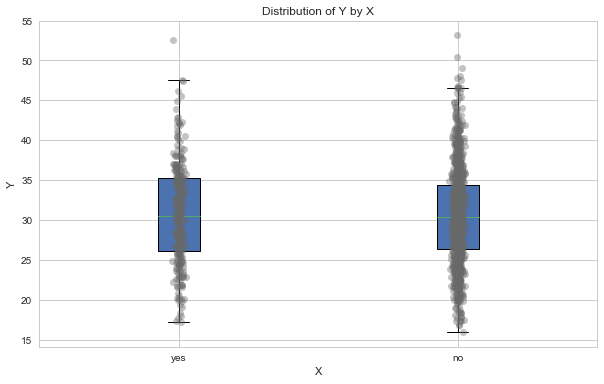

In [66]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
grouped = insurance.groupby('smoker')[ "bmi"]
labels = pd.unique(insurance["smoker"].values)
grouped_data = [grouped.get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
for i, k in enumerate(labels):
    subdata = grouped.get_group( k)
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)
axes.set_xlabel("bmi")
axes.set_ylabel("smoker")
axes.set_title("Distribution of Y by X")
plt.show()
plt.close()


Surprisingly, it does not appear to be a difference between the BMI of smokers and nonsmokers

#### age vs. children
For this, I expect the younger people to have less children than older

In [68]:
print( "r =", stats.pearsonr(insurance["age"], insurance["children"])[0])
print( "rho =", stats.spearmanr(insurance["age"], insurance["children"])[0])

r = 0.04246899855884948
rho = 0.05699222356207542


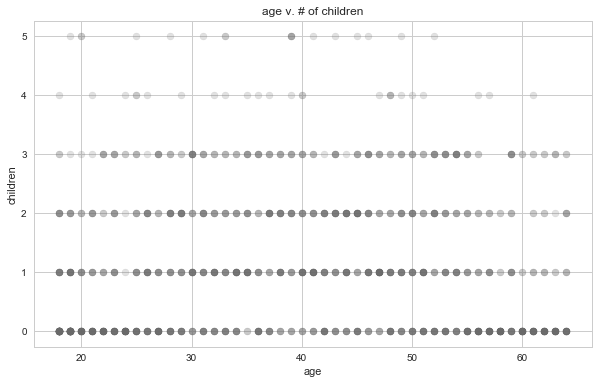

In [73]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance["age"], insurance["children"],alpha=.2, marker="o", color="DimGray")
axes.set_title("age v. # of children")
axes.set_xlabel( "age")
axes.set_ylabel( "children")
plt.show()
plt.close()

I think r and rho in this case was not a great measure, because age and children are both discrete and not continuous. However, I do see some weird stuff even with this graph. Somehow, there are 19 and 20 year olds with 5 children, which does seem a little odd. Also, it appears that no children are most concentrated in the lower and higher ages. Perhaps that is due to the way that the question is phrased, and the older people do not have "children" under 18. 

#### bmi vs. charges
I am making the assumption that the higher that bmi is, the higher the charges are

In [72]:
print( "r =", stats.pearsonr(insurance["bmi"], insurance["charges"])[0])
print( "rho =", stats.spearmanr(insurance["bmi"], insurance["charges"])[0])

r = 0.19834096883362887
rho = 0.11939590358331145


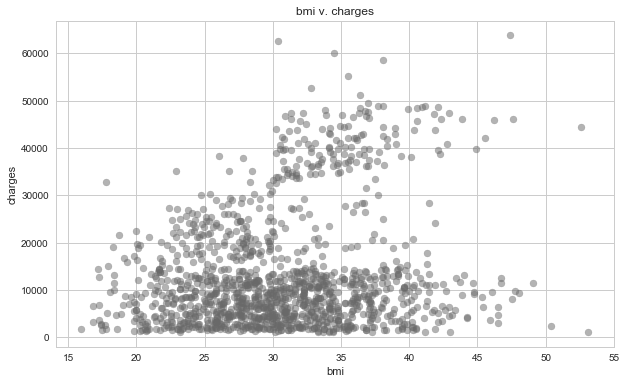

In [82]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance["bmi"], insurance["charges"],alpha=.5, marker="o", color="DimGray")
axes.set_title("bmi v. charges")
axes.set_xlabel( "bmi")
axes.set_ylabel( "charges")
plt.show()
plt.close()

Oddly enough, it does not seem that bmi is that highly correlated with charges. Although it does look like there are two segments, with one segment whose charges increase with bmi and another whose charges do not. 

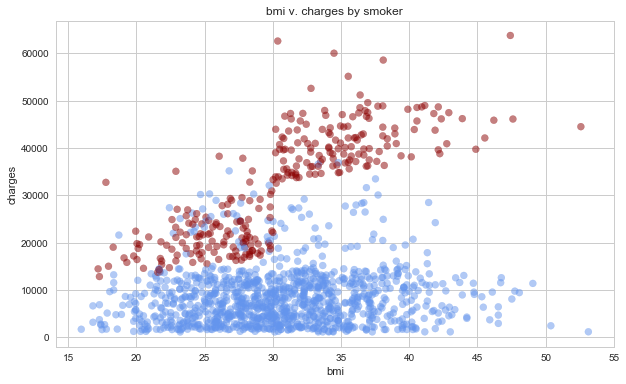

In [81]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
colors = insurance["smoker"].apply(lambda x: "DarkRed" if x == "yes" else "CornflowerBlue")
axes.scatter( insurance["bmi"], insurance["charges"],alpha=.5, marker="o", color=colors)
axes.set_title("bmi v. charges by smoker")
axes.set_xlabel( "bmi")
axes.set_ylabel( "charges")
plt.show()
plt.close()

If we split it out by the smoker and non-smoker categories, it does indeed seem that for the smoker category bmi is correlated with charges. 